# Regresion lineal multiple

Regresion lineal multiple

Matriz de varianzas y covarianzas

Yi = Bo + B1Xi1 + B2Xi2 + BkXik + Ei

R2 adj utilizado para modelos de multiples variables porque penaliza las variables innecesarias y disminuye si se añaden variables no significativas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import itertools

data = pd.read_csv('Base de datos.txt', sep=' ')
X = data[["X1", "X2", "X3", "X4", "X5"]]
X = sm.add_constant(X)
y = data['Y']
n = data.shape[0]
k = data.shape[1] - 1

modelo = sm.OLS(y, X).fit()
print(modelo.summary()) # X2 y X4 no son significativas para el modelo por sus valores P

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     20.87
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           3.09e-12
Time:                        17:47:57   Log-Likelihood:                -77.779
No. Observations:                  69   AIC:                             167.6
Df Residuals:                      63   BIC:                             181.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2449      1.231     -0.199      0.8

In [ ]:
# Identificacion de observaciones atipicas e Influyentes: 1ero estandarizamos los residuales

SSE = modelo.ssr
df_error = modelo.df_resid # ( n - (k + 1))
MSE = SSE / df_error # con este valor podemos hallar los residuales estandarizados
residuales_estandarizados = modelo.resid / np.sqrt(MSE)

print(SSE)
print(MSE)
#print(residuales_estandarizados)

obs_atipicas = (abs(residuales_estandarizados) > 3).sum() # Observaciones atipicas con residuals standarizados

print(obs_atipicas)

influence = modelo.get_influence()

obs_atipicas1 = (abs(influence.resid_studentized_internal) > 3).sum() # Observaciones atipicas con residuals estudentizados
print(obs_atipicas1)

hat_matrix = influence.hat_matrix_diag # esto da los resultados de la diagonal de la matriz Hii
print((hat_matrix > (2*(k+1))/ n).sum()) # Puntos de balanceo

# Distancia de cook muestra los puntos mas influyentes ---> Di > 1

print((influence.cooks_distance[0] > 1).sum()) # Distancia de Cook

# DFFITS

dffits = influence.dffits[0]
print((abs(dffits) > 2 * np.sqrt((k+1) / n)).sum()) # Punto influyente si cumple con la condicion
influential_points_indices = data.index[abs(dffits) > 2 * np.sqrt((k+1) / n)]

print(f"Indices of influential points to exclude: {influential_points_indices}")

data_filtered = data.drop(influential_points_indices)

X_filtered = data_filtered[["X1", "X2", "X3", "X4", "X5"]]
X_filtered = sm.add_constant(X_filtered)
y_filtered = data_filtered['Y']

# Refit the OLS model
modelo_filtered = sm.OLS(y_filtered, X_filtered).fit()

print("\nSummary of the OLS model after excluding influential points:")
print(modelo_filtered.summary())

38.50098184181602
0.6111266959018417
0
0
8
0
3
Indices of influential points to exclude: Index([13, 40, 62], dtype='int64')

Summary of the OLS model after excluding influential points:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     28.07
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           1.53e-14
Time:                        17:43:18   Log-Likelihood:                -67.595
No. Observations:                  66   AIC:                             147.2
Df Residuals:                      60   BIC:                             160.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef   

           Y        X1        X2        X3        X4        X5
Y   1.000000  0.563923  0.137412  0.693244  0.475060  0.279202
X1  0.563923  1.000000  0.295763  0.290555  0.466250  0.259484
X2  0.137412  0.295763  1.000000 -0.133579  0.099745  0.077909
X3  0.693244  0.290555 -0.133579  1.000000  0.442888 -0.075056
X4  0.475060  0.466250  0.099745  0.442888  1.000000 -0.132226
X5  0.279202  0.259484  0.077909 -0.075056 -0.132226  1.000000


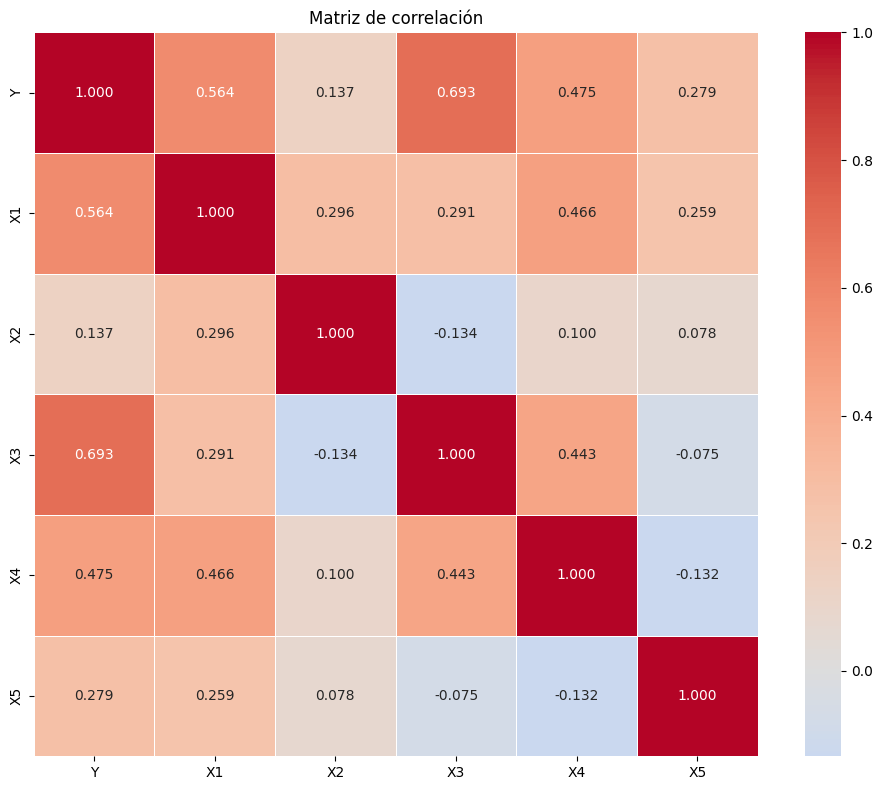

In [4]:
# Multicolinealidad: surge cuando variables explicativas tienen relacion lineal entre ellas

# Matriz de correlaciones

corr_matrix = data_filtered.corr()
print(corr_matrix)

# Grafico de matriz de dispersion

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0, square=True, fmt='.3f')
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

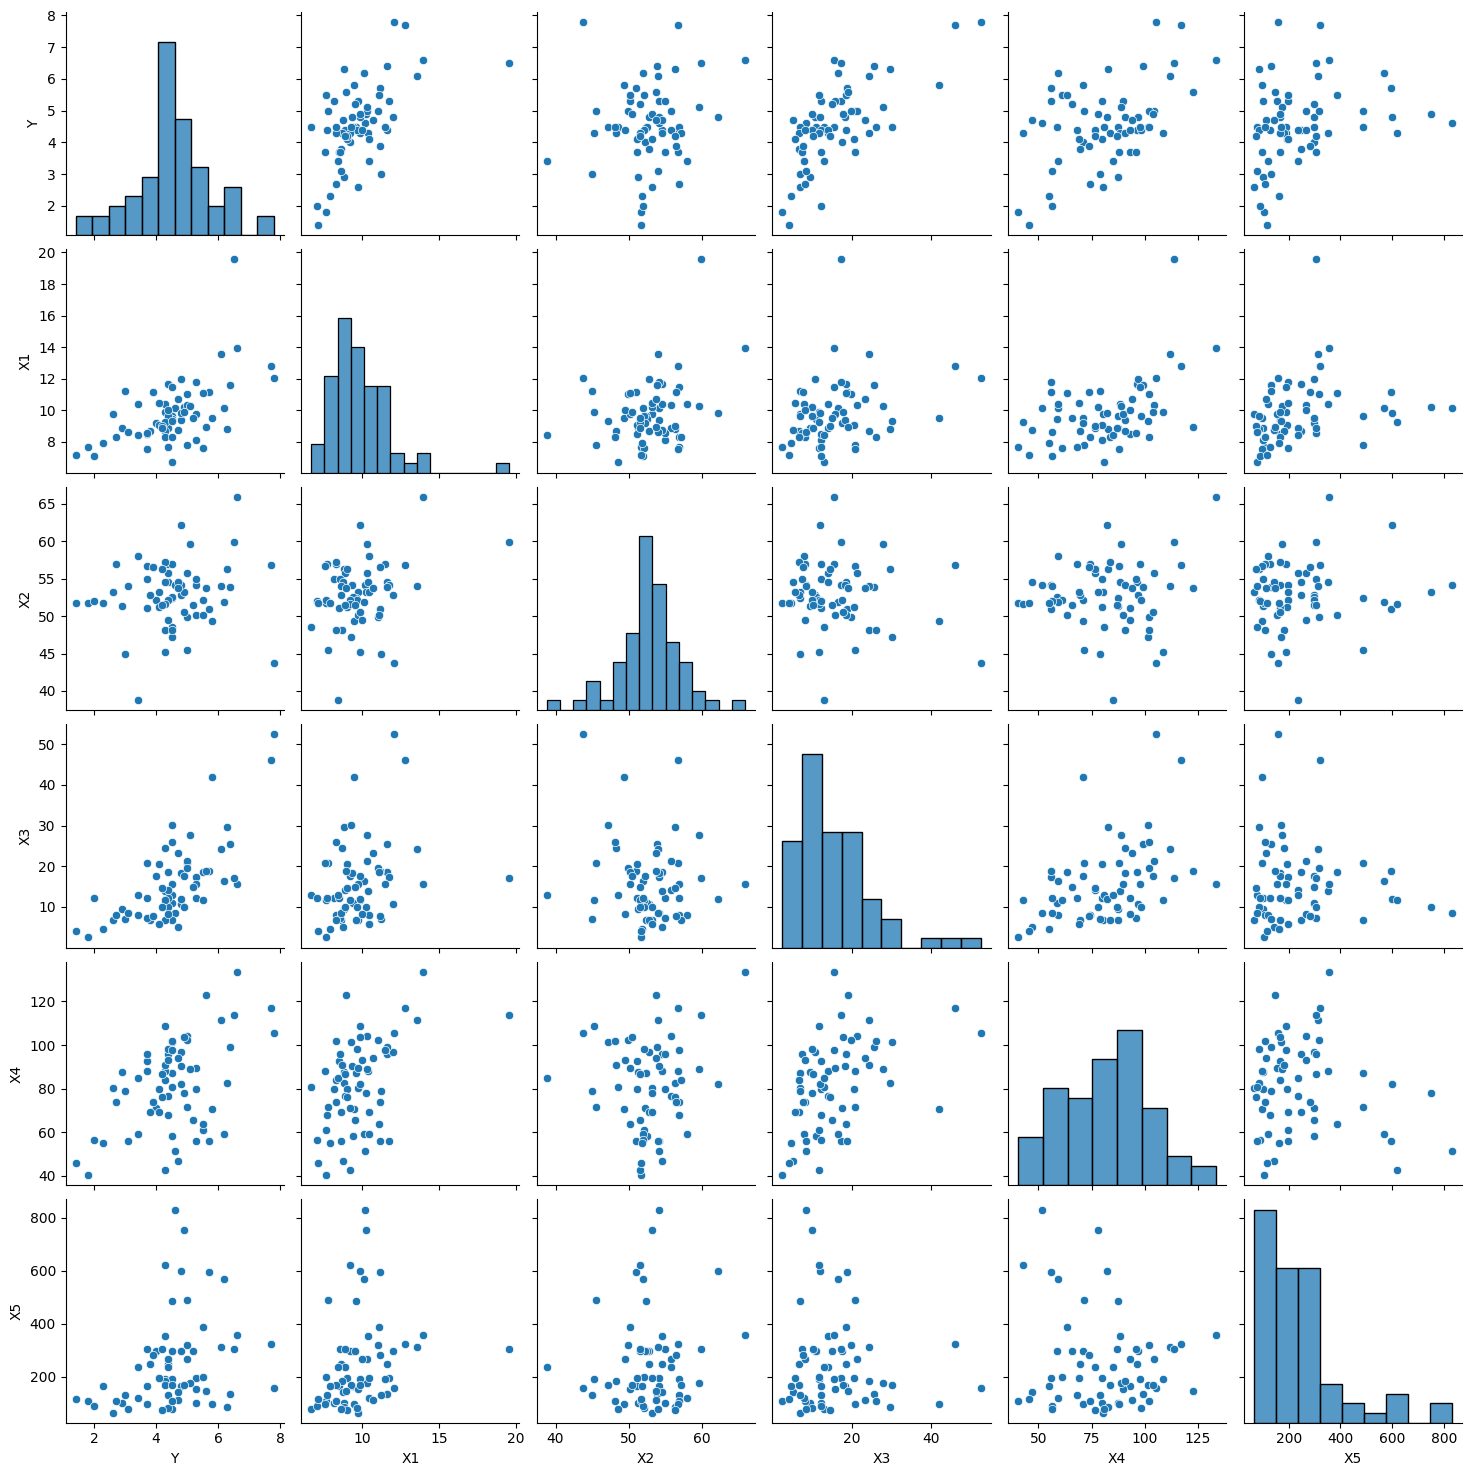

In [5]:
sns.pairplot(data_filtered)
plt.show()

In [6]:
# Para identificar si hay multicolinealidad usamos VIF ( Factor de Inflacion de Varianza)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Primero estandarizar las variables
# Criterios VIF: <= 5 NO hay multicolinealidad, Entre 5 y 10 Multicolinealidad moderada, Mayor a 10 Multicolinealidad severa

def calcular_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_result = calcular_vif(X_filtered.drop('const', axis=1))
print(vif_result)

  Variable        VIF
0       X1  43.659929
1       X2  33.083096
2       X3   4.885619
3       X4  26.974258
4       X5   3.667947


In [7]:
# Otra forma de revisar multicolinealidad es: Valores propios

# Numero de condicion k = valor propio maximo / valor propio minimo, si K <= 100 NO hay multicolinealidad, Entre 100 y 1000 moderada, mayor a 1000 multicolinealidad severa

# Calculate eigenvalues of the design matrix (X_filtered)
design_matrix = X_filtered.T.dot(X_filtered)
valores_propios = np.linalg.eigvals(design_matrix)
print(valores_propios)

# Calculate the condition number
condition_number = (valores_propios.max() / valores_propios.min())
print(f"\nCondition Number (k): {condition_number}")

# Indice de condicion
indice_condicion = np.sqrt(valores_propios.max() / valores_propios)

print(((indice_condicion > 10)).sum())

[6.14257254e+06 2.24668020e+05 7.49583868e+03 4.23635862e+03
 3.86182305e-01 1.48736952e+02]

Condition Number (k): 15905888.119757948
4


In [13]:
# Metodo para la seleccion de las mejores variables para el modelo final

# Procedimientos para reduccion de variables

# El mejor modelo es el que tiene R2adj mas alto, MCE (cuadrado medio del error) mas bajo

# Estadistico Cp de Mallows calcularlo para cada una de las regresiones para hallar el mejor subset de variables predictoras ( Xi ).

# Procedimientos automaticos (metodo forward, backward y stepwise )

# Cp (debe ser pequeño), R2adj (debe ser grande), Cuadrado medio del error (debe ser pequeño), valor P de cada parametro en cada modelo

def all_reg_table(X, y, max_vars=len(X.columns) - 1):
    results = []
    variables = X.columns[1:]  # Excluimos la constante

    for k in range(1, min(len(variables) + 1, max_vars + 1)):
        for combo in itertools.combinations(variables, k):
            combo_vars = list(combo)
            X_combo = X[['const'] + combo_vars]
            modelo_combo = sm.OLS(y, X_combo).fit()

            n = len(y)
            p = k + 1  # Incluye el intercepto

            MCE_full = modelo_combo.mse_resid
            SSE_p = modelo_combo.ssr
            Cp = (SSE_p / MCE_full) - (n - 2 * p)

            results.append({
                'Numero de variables': k,
                'R2': modelo_combo.rsquared,
                'SSE': modelo_combo.ssr,
                'MCE': modelo_combo.mse_resid,
                'R2 ajustado': modelo_combo.rsquared_adj,
                'Cp': Cp,
                'Variables': ' '.join(combo_vars)
            })


    return pd.DataFrame(results).sort_values('R2 ajustado', ascending=False)

print ("TABLA DE TODAS LAS REGRESIONES POSIBLES:")
print (all_reg_table(X_filtered , y_filtered).head(10))
print ("\n" + "=" *60 + "\n")



TABLA DE TODAS LAS REGRESIONES POSIBLES:
    Numero de variables        R2        SSE       MCE  R2 ajustado   Cp  \
30                    5  0.700554  29.967807  0.499463     0.675600  6.0   
26                    4  0.690438  30.980201  0.507872     0.670139  5.0   
28                    4  0.688336  31.190605  0.511321     0.667899  5.0   
19                    3  0.677350  32.289995  0.520806     0.661738  4.0   
29                    4  0.670845  32.941025  0.540017     0.649261  5.0   
24                    3  0.641810  35.846741  0.578173     0.624479  4.0   
15                    3  0.635175  36.510790  0.588884     0.617522  4.0   
22                    3  0.634930  36.535276  0.589279     0.617266  4.0   
25                    4  0.636534  36.374834  0.596309     0.612700  5.0   
6                     2  0.624109  37.618283  0.597116     0.612176  3.0   

         Variables  
30  X1 X2 X3 X4 X5  
26     X1 X2 X3 X5  
28     X1 X3 X4 X5  
19        X1 X3 X5  
29     X2 X3 X4 X